In [23]:
from scipy.integrate import quad

import TMQGP as tm
from numpy import *

import QuarkTM

import matplotlib
matplotlib.style.use('publication23')

mQ = 0.6

tm.Efirst_k_integral

qrange = linspace(0, 5, 51)
erange = linspace(-5, 5, 201)

pt = QuarkTM.Particle(mQ, qrange, erange, eps=10e-2)

T = 0.2

ch = QuarkTM.Channel(pt, pt, T, G=50)

In [24]:
ch.populate_T()

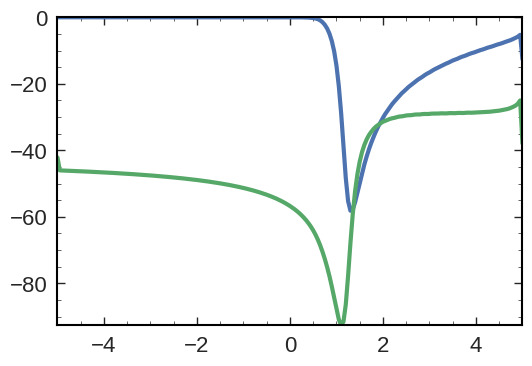

In [25]:
plt.plot(erange, imag(ch.TM[:, 0]))
plt.plot(erange, real(ch.TM[:, 0]))

In [26]:
iEps = tm.Interpolator(qrange, pt.om0(qrange), 'cubic')

In [27]:
import tqdm

In [28]:
ch.TM.shape

(201, 51)

In [29]:
ascontiguousarray(real(1/ch.TM)).shape

(201, 51)

In [30]:
iT_inv = tm.InterDenom2D(qrange, erange, ascontiguousarray(real(1/ch.TM)), ascontiguousarray(imag(1/ch.TM)))

In [31]:
iR = tm.Interpolator2D(qrange, erange, -2*imag(pt.Gtab))

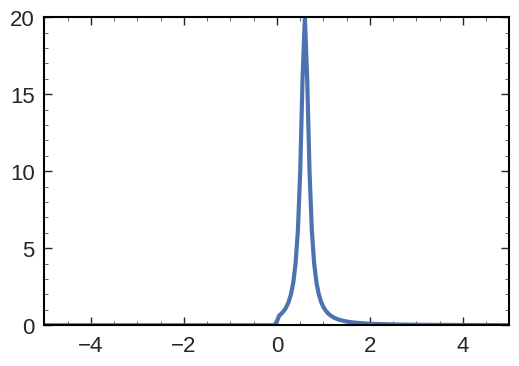

In [32]:
plt.plot(erange, -2*imag(pt.Gtab[:, 0]))

In [33]:
iR(0.5, 0.5)

2.2478216032548204

In [34]:
iR_inv = tm.InterDenom2D(qrange, erange, ascontiguousarray(real(-pi/pt.Gtab)), ascontiguousarray(imag(-pi/pt.Gtab)))

In [35]:
pt.R(0.5, 0.5)

0.3577519193467539

In [36]:
iR_inv(0.5, 0.5)

0.3577519193467539

In [37]:
ch.iImT(0.5, 0.5)

-0.1260364392866236

In [38]:
iT_inv(0.5, 0.5)

-0.12603643928662364

In [39]:
s1 = array([tm.sigma_ff_onshell(e, 0, T, ch.iImT, pt.R, iEps, iEps, 0) for e in tqdm.notebook.tqdm(erange)])

  0%|          | 0/201 [00:00<?, ?it/s]

In [40]:
s2 = array([tm.sigma_ff_onshell(e, 0, T, iT_inv, iR_inv, iEps, iEps, 0) for e in tqdm.notebook.tqdm(erange)])

  0%|          | 0/201 [00:00<?, ?it/s]

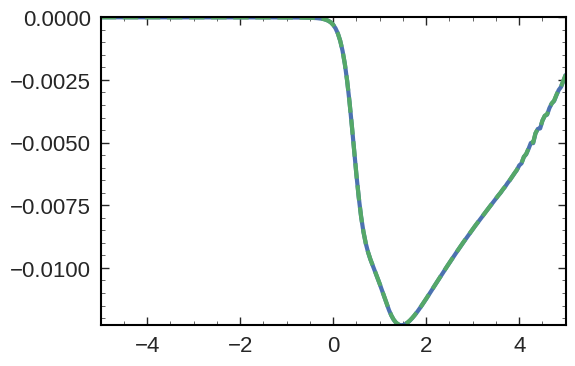

In [41]:
plt.plot(erange, s1)
plt.plot(erange, s2, ls='--')

In [42]:
s2 = array([tm.Efirst_k_integral(e, 0, T, ch.iImT, pt.R, iEps, iEps, 0, 0) for e in tqdm.notebook.tqdm(erange)])

  0%|          | 0/201 [00:00<?, ?it/s]

In [43]:
s3 = array([tm.Efirst_k_integral(e, 0, T, iT_inv, iR_inv, iEps, iEps, 0, 0) for e in tqdm.notebook.tqdm(erange)])

  0%|          | 0/201 [00:00<?, ?it/s]

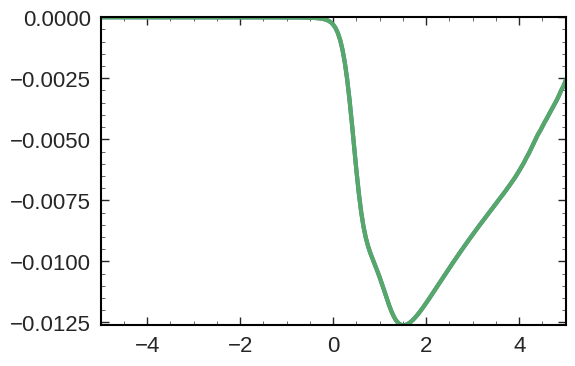

In [44]:
plt.plot(erange, s2)
plt.plot(erange, s3)
# plt.ylim(-0.2, 1)

## Compare integrands

In [45]:
int1 = array([tm.x_cm_onshell_integrand(0.5, e, 0, 0., 0.5, ch.iImT, pt.R, iEps, iEps, 0, 0) for e in erange])

In [46]:
int2 = array([tm.Efirst_cm_onshell_integrand(0, e, 0 , 0.5, 0.5, 0.2, ch.iImT, pt.R, iEps, iEps, 0, 0) for e in erange])

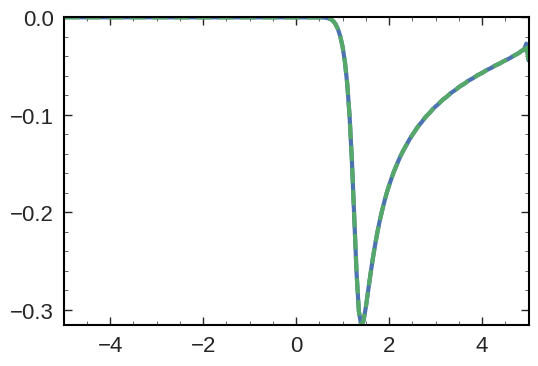

In [47]:
plt.plot(erange, int1)
plt.plot(erange, int2*0.5**2/4/pi**2, ls='--')